In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.rename(columns={'y':'target'},inplace=True)

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

# Descriptive Analysis:

## Profil of actual subscriber

### Age

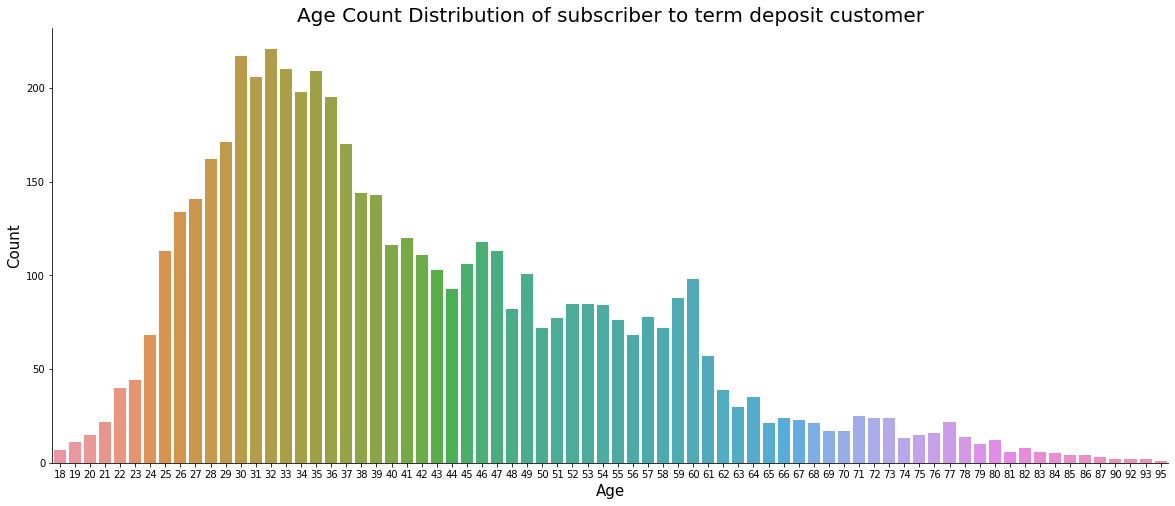

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df[df.target=='yes'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution of subscriber to term deposit customer', fontsize=20)
sns.despine()

### Marital status

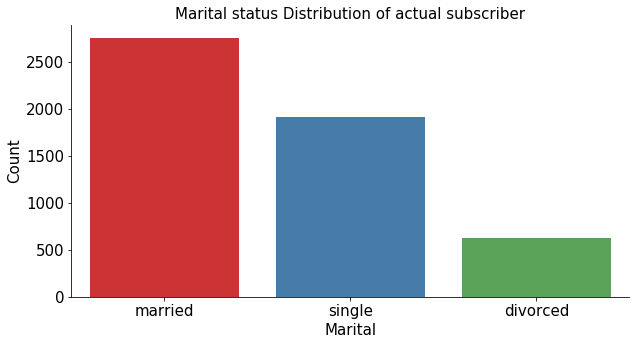

In [13]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df[df.target=='yes'],palette='Set1')
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status Distribution of actual subscriber', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Job and level of study

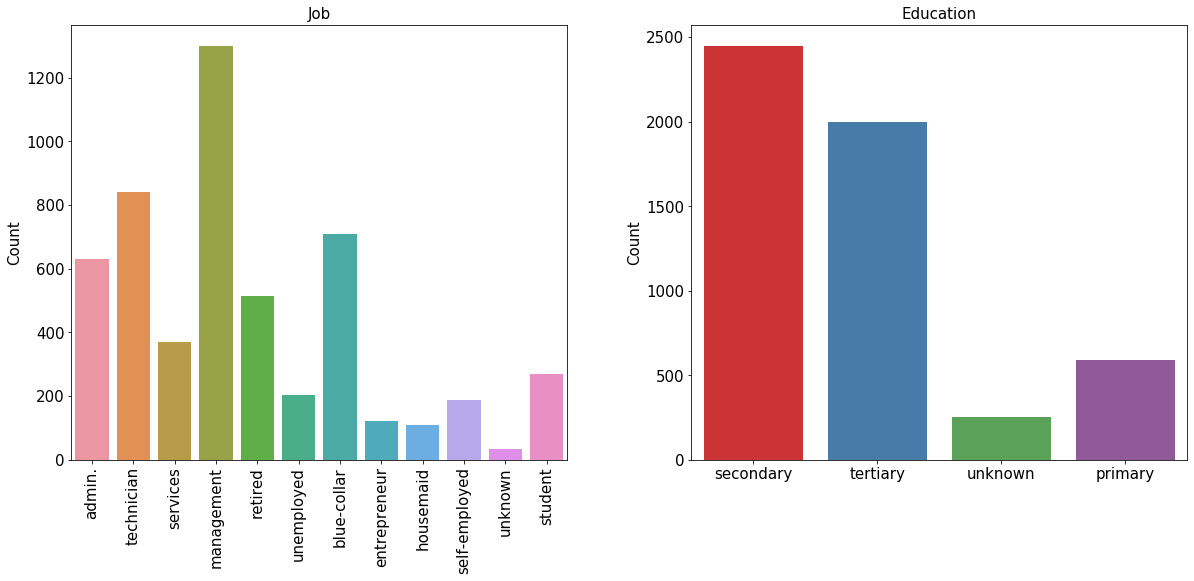

In [14]:
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
# job 
chart = sns.countplot(x = 'job', data = df[df.target=='yes'], ax = ax2)
ax2.set_title('Job', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# level of study
sns.countplot(x = 'education', data = df[df.target=='yes'], ax = ax3,palette='Set1')
ax3.set_title('Education', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

### Housing and loan situation

In [15]:
table = pd.crosstab(df['loan'], df['target'])
table

target,no,yes
loan,,
no,33162,4805
yes,6760,484


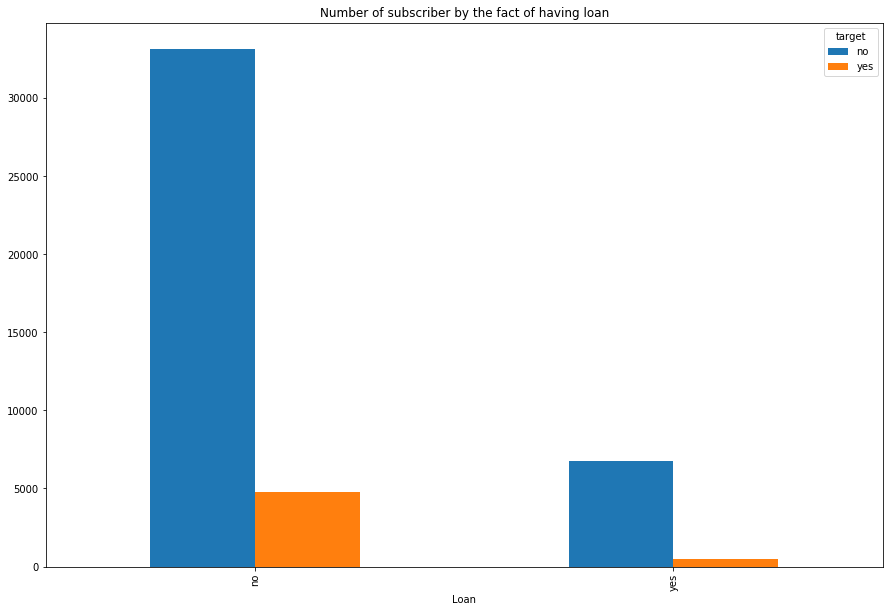

In [16]:
ax = table.plot(kind='bar',
                figsize=(15, 10),
                 title="Number of subscriber by the fact of having loan")
ax.set_xticks(range(len(table)))
ax.set_xlabel("Loan")
ax.set_xticklabels(table.index);

In [17]:
table2 = pd.crosstab(df['housing'], df['target'])
table2

target,no,yes
housing,,
no,16727,3354
yes,23195,1935


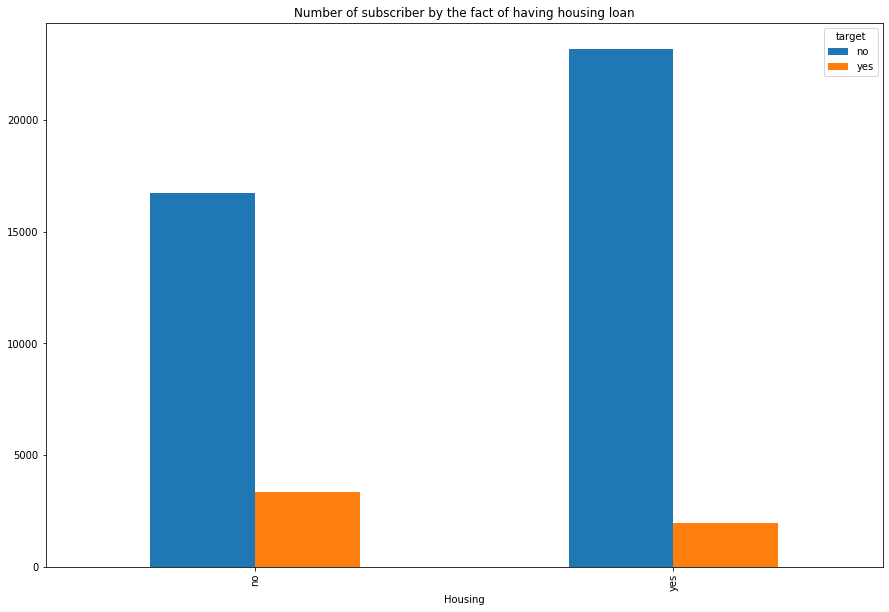

In [18]:
ax2 = table2.plot(kind='bar',
                figsize=(15, 10),
                 title="Number of subscriber by the fact of having housing loan")
ax2.set_xticks(range(len(table2)))
ax2.set_xlabel("Housing")
ax2.set_xticklabels(table2.index);

## Information about compaign contact

In [20]:
mean_duration = df.groupby('target')[['duration']].mean()/60

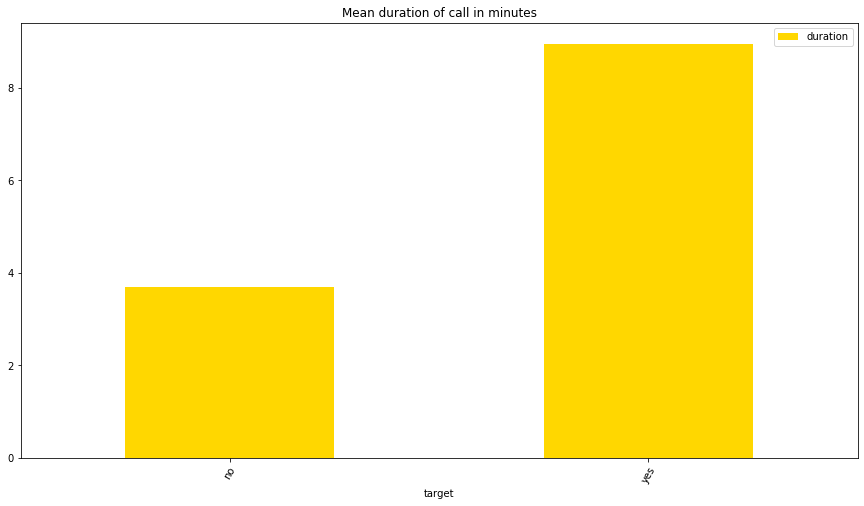

In [21]:
mean_duration.plot(figsize=(15, 8),kind='bar',color=['gold'],rot=60,title="Mean duration of call in minutes");

In [22]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

In [23]:
# creating dummies for default, housing, loan, y
# categorical: job, marital status, education, contact, month, poutcome

In [24]:
dummies_list = ['job','marital','education','default','housing','loan','contact','poutcome','target']
df1 = pd.get_dummies(data=df,columns=dummies_list,drop_first=True)
df1

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,target_yes
0,58,2143,5,may,261,1,-1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,29,5,may,151,1,-1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,33,2,5,may,76,1,-1,0,0,1,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,may,92,1,-1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,5,may,198,1,-1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,17,nov,456,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,17,nov,1127,5,184,3,0,0,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,17,nov,508,4,-1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
df1.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'target_yes'],
      dtype='object')

In [26]:
#lets drop month column and keep day and duration
df1.drop('month',axis=1,inplace=True)

In [27]:
df1.rename(columns={'default_yes':'has_credit','housing_yes':'housing','loan_yes':'loan','target_yes':'target'},inplace=True)

In [28]:
df1.dtypes;

In [29]:
df1.isna().sum();

In [30]:
df1.shape

(45211, 32)

In [31]:
def checkdrop_unknown_values(df,threshold):
    for col in df.columns.to_list():
        if 'unknown' in col:
            proportion = df1[col].value_counts()/df1.shape[0]    
            print('proportion of unknown or other values of the column',col, 'is', proportion.iloc[1])
            if proportion.iloc[1]<threshold:
                df.drop(col, axis=1, inplace=True)
        
checkdrop_unknown_values(df1,0.3)

proportion of unknown or other values of the column job_unknown is 0.006370131162770122
proportion of unknown or other values of the column education_unknown is 0.04107407489327818
proportion of unknown or other values of the column contact_unknown is 0.28798301298356593
proportion of unknown or other values of the column poutcome_unknown is 0.18252195262214949


In [32]:
df1.poutcome_other.value_counts()/df1.shape[0]

0    0.959302
1    0.040698
Name: poutcome_other, dtype: float64

In [33]:
df1.drop('poutcome_other', axis=1, inplace=True)

In [34]:
df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'has_credit', 'housing', 'loan', 'contact_telephone',
       'poutcome_success', 'target'],
      dtype='object')

In [35]:
correlation = df1.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,marital_married,marital_single,education_secondary,education_tertiary,has_credit,housing,loan,contact_telephone,poutcome_success,target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,...,0.286257,-0.427817,-0.093979,-0.081629,-0.017879,-0.185513,-0.015655,0.170349,0.035526,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,...,0.025708,-0.012537,-0.069937,0.084001,-0.066745,-0.068768,-0.084350,0.037999,0.035240,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.022898,-0.002312,0.003955,...,0.007102,-0.007412,-0.005831,0.021730,0.009424,-0.027982,0.011370,0.023652,-0.030321,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.009637,-0.001327,-0.008046,...,-0.022683,0.020328,0.002084,0.000891,-0.010021,0.005075,-0.012412,-0.023201,0.042389,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,...,0.031371,-0.023120,-0.020893,0.012866,0.016822,-0.023599,0.009980,0.053895,-0.057486,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,...,-0.027600,0.027943,0.022105,-0.007568,-0.029979,0.124178,-0.022754,0.016006,0.228539,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,...,-0.012691,0.017006,-0.005603,0.022888,-0.018329,0.037076,-0.011043,0.028097,0.201424,0.093236
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,...,0.122033,-0.088315,0.040548,-0.320541,0.010341,0.177475,0.018291,-0.003190,-0.053074,-0.072083
job_entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,...,0.044319,-0.050297,-0.054865,0.067639,0.026281,0.010600,0.039808,-0.004338,-0.019111,-0.019662
job_housemaid,0.086650,0.001661,0.003955,-0.008046,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,...,0.045816,-0.062177,-0.065396,-0.057004,-0.000359,-0.079380,-0.017234,0.039371,-0.009375,-0.015195


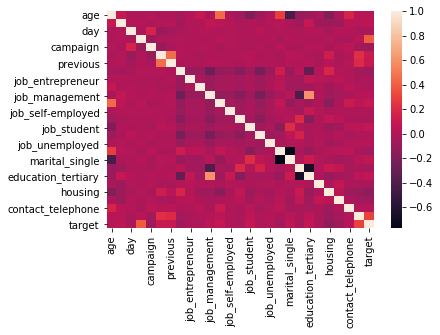

In [36]:
sns.heatmap(correlation)

we can deduce that there is not a correlation between features.

In [39]:
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
#labels
lab = df1["target"].value_counts().keys().tolist()
#values
val = df1["target"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer subscribing a term deposit",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

We deduce from this piechart that the data is not balanced. 

# Model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df1.drop('y',axis=1)
y = df1['y']

In [33]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,has_credit,housing,loan,contact_telephone,poutcome_success
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.028820,0.601933,0.282896,0.513194,0.294198,0.018027,0.555838,0.160226,0.064276,0.033421
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.167303,0.489505,0.450411,0.499831,0.455687,0.133049,0.496878,0.366820,0.245247,0.179735
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the data is not in the same scale. So let's convert them into a coherent data by applying the Standardscaler

In [37]:
from sklearn.preprocessing import StandardScaler
standardscaller = StandardScaler()
X_scaled = standardscaller.fit_transform(X)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=40,stratify=y)

In [39]:
y_train.value_counts(normalize=True)

0    0.883018
1    0.116982
Name: y, dtype: float64

## KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,auc, roc_auc_score, roc_curve,f1_score,precision_score,recall_score

In [41]:
X_train_scalled_df = pd.DataFrame(X_train,columns=X.columns)

In [42]:
knn=KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
confusion_matrix(y_test,y_pred1)

array([[7751,  234],
       [ 726,  332]], dtype=int64)

In [88]:
acc0 = accuracy_score(y_test,y_pred1)
f_score0 = f1_score(y_test,y_pred1)
precision0 = precision_score(y_test,y_pred1) 
recall0 = recall_score(y_test,y_pred1)
dct = {'model':'KNeighborsClassifier','accuracy':acc0,'f1_score':f_score0,'precision':[precision0],'recall':recall0}
df_models = pd.DataFrame(data=dct)
df_models

,model,accuracy,f1_score,precision,recall
0,KNeighborsClassifier,0.893841,0.408867,0.586572,0.3138


The scalling does not change a lot in the resulat of knnclassifier.
Let's try another type of model. Because we don't have yet a satisfactory result

## Logistic Regresion

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logist=LogisticRegression(max_iter=10000, class_weight='balanced')
logist.fit(X_train,y_train)
y_pred3=logist.predict(X_test)
confusion_matrix(y_test,y_pred3)

array([[6651, 1334],
       [ 218,  840]], dtype=int64)

In [91]:
acc1 = accuracy_score(y_test,y_pred3)
f_score1 = f1_score(y_test,y_pred3)
precision1 = precision_score(y_test,y_pred3)
recall1 = recall_score(y_test,y_pred3)
recall1

0.7939508506616257

In [92]:
dct = {'model':'LogisticRegression','accuracy':acc1,'f1_score':f_score1,'precision':[precision1],'recall':recall1}

In [93]:
df_model1 = pd.DataFrame(data=dct)
df_models.append(df_model1)

,model,accuracy,f1_score,precision,recall
0,KNeighborsClassifier,0.893841,0.408867,0.586572,0.313800
0,LogisticRegression,0.828376,0.519802,0.386385,0.793951


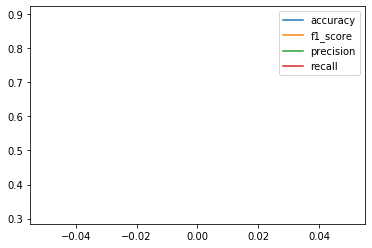

In [97]:
df_models.plot()

## Non-linear Support Vector machine

In [94]:
from sklearn.svm import NuSVC

In [128]:
nusvc = NuSVC(nu=0.1,probability=True)
nusvc.fit(X_train,y_train)
y_pred4 = nusvc.predict(X_test)
confusion_matrix(y_test,y_pred4)

array([[7489,  496],
       [ 668,  390]], dtype=int64)

In [98]:
acc2 = accuracy_score(y_test,y_pred4)

f_score2 = f1_score(y_test,y_pred4)
precision2 = precision_score(y_test,y_pred4)
recall2 = recall_score(y_test,y_pred4)

In [127]:
?NuSVC

In [99]:
dct = {'model':'NuSVC','accuracy':acc2,'f1_score':f_score2,'precision':[precision2],'recall':recall2}
df_model2 = pd.DataFrame(data=dct)
df_models = df_models.append(df_model2)

# Other models

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [101]:
model_list = [RandomForestClassifier, DecisionTreeClassifier, GaussianNB]
l_models = []
l_acc = []
for model in model_list:
    print('-------------------------------------------------------------------------------')
    model_name = model.__name__
    print('The model ', model_name,' is STARTED')
    model5 = model().fit(X_train, y_train)
    l_models.append(model5)
    y_pred5 = model5.predict(X_test)
    print('Accuracy of',model_name,' =', accuracy_score(y_test, y_pred5))
    print('Confusion matrix = ',confusion_matrix(y_test, y_pred5))
    
    l_acc.append(accuracy_score(y_test, y_pred5))

-------------------------------------------------------------------------------
The model  RandomForestClassifier  is STARTED
Accuracy of RandomForestClassifier  = 0.9053411478491651
Confusion matrix =  [[7785  200]
 [ 656  402]]
-------------------------------------------------------------------------------
The model  DecisionTreeClassifier  is STARTED
Accuracy of DecisionTreeClassifier  = 0.8587858011721774
Confusion matrix =  [[7297  688]
 [ 589  469]]
-------------------------------------------------------------------------------
The model  GaussianNB  is STARTED
Accuracy of GaussianNB  = 0.8595598805706071
Confusion matrix =  [[7216  769]
 [ 501  557]]


In [102]:
model6 = DecisionTreeClassifier(class_weight='balanced')
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
acc3 =accuracy_score(y_test,y_pred6)

f_score3 = f1_score(y_test,y_pred6)
precision3 = precision_score(y_test,y_pred6)
recall3 = recall_score(y_test,y_pred6)
dct = {'model':'DecisionTreeClassifier','accuracy':acc3,'f1_score':f_score3,'precision':[precision3],'recall':recall3}
df_model3 = pd.DataFrame(data=dct)
df_models = df_models.append(df_model3)
df_models

,model,accuracy,f1_score,precision,recall
0,KNeighborsClassifier,0.893841,0.408867,0.586572,0.313800
0,NuSVC,0.871282,0.401235,0.440181,0.368620
0,DecisionTreeClassifier,0.860666,0.415042,0.407847,0.422495


In [103]:
model7 = RandomForestClassifier(class_weight='balanced')
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)
acc4 = accuracy_score(y_test,y_pred7)

f_score4 = f1_score(y_test,y_pred7)
precision4 = precision_score(y_test,y_pred7)
recall4 = recall_score(y_test,y_pred7)
dct = {'model':'RandomForestClassifier','accuracy':acc4,'f1_score':f_score4,'precision':[precision4],'recall':recall4}

df_model4 = pd.DataFrame(data=dct)
df_models = df_models.append(df_model4)
df_models

,model,accuracy,f1_score,precision,recall
0,KNeighborsClassifier,0.893841,0.408867,0.586572,0.313800
0,NuSVC,0.871282,0.401235,0.440181,0.368620
0,DecisionTreeClassifier,0.860666,0.415042,0.407847,0.422495
0,RandomForestClassifier,0.898927,0.410323,0.646341,0.300567


In [104]:
confusion_matrix(y_test,y_pred7)

array([[7811,  174],
       [ 740,  318]], dtype=int64)

In [105]:
confusion_matrix(y_test,y_pred6)

array([[7336,  649],
       [ 611,  447]], dtype=int64)

In [130]:
model8 = XGBClassifier()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
confusion_matrix(y_test,y_pred8)
acc5 = accuracy_score(y_test,y_pred8)

f_score5 = f1_score(y_test,y_pred8)
precision5 = precision_score(y_test,y_pred8)
recall5 = recall_score(y_test,y_pred8)
dct = {'model':'XGBClassifier','accuracy':acc5,'f1_score':f_score5,'precision':[precision5],'recall':recall5}

df_model5 = pd.DataFrame(data=dct)
df_models = df_models.append(df_model5)
df_models

,model,accuracy,f1_score,precision,recall
0,KNeighborsClassifier,0.893841,0.408867,0.586572,0.313800
0,NuSVC,0.871282,0.401235,0.440181,0.368620
0,DecisionTreeClassifier,0.860666,0.415042,0.407847,0.422495
0,RandomForestClassifier,0.898927,0.410323,0.646341,0.300567
0,XGBClassifier,0.905009,0.518768,0.636864,0.437618
0,XGBClassifier,0.905009,0.518768,0.636864,0.437618


Let's check the roc_auc_score of those models

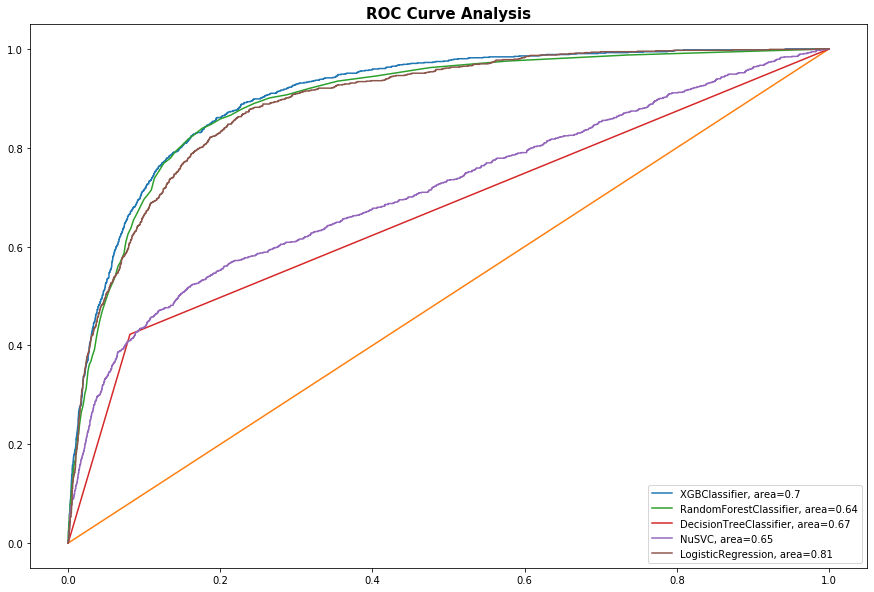

In [129]:
import matplotlib.pyplot as plt
model_roc=roc_auc_score(y_test,y_pred8)
fpr,tpr,thresholds=roc_curve(y_test, model8.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,10))
plt.plot(fpr,tpr, label=f'XGBClassifier, area={model_roc.round(2)}')
plt.plot([0,1],[0,1])
plt.legend()

model_roc2=roc_auc_score(y_test,y_pred7)
fpr,tpr,thresholds=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label=f'RandomForestClassifier, area={model_roc2.round(2)}')
plt.legend()

model_roc3=roc_auc_score(y_test,y_pred6)
fpr,tpr,thresholds=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label=f'DecisionTreeClassifier, area={model_roc3.round(2)}')
plt.legend()


model_roc4=roc_auc_score(y_test,y_pred4)
fpr,tpr,thresholds=roc_curve(y_test, nusvc.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label=f'NuSVC, area={model_roc4.round(2)}')
plt.legend()

model_roc5=roc_auc_score(y_test,y_pred3)
fpr,tpr,thresholds=roc_curve(y_test, logist.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label=f'LogisticRegression, area={model_roc5.round(2)}')
plt.legend()


plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

In [68]:
roc_auc_score(y_test,y_pred8)

0.7022780781072262

In [98]:
f1_score(y_test,l_ypred[0])

0.4741532976827094

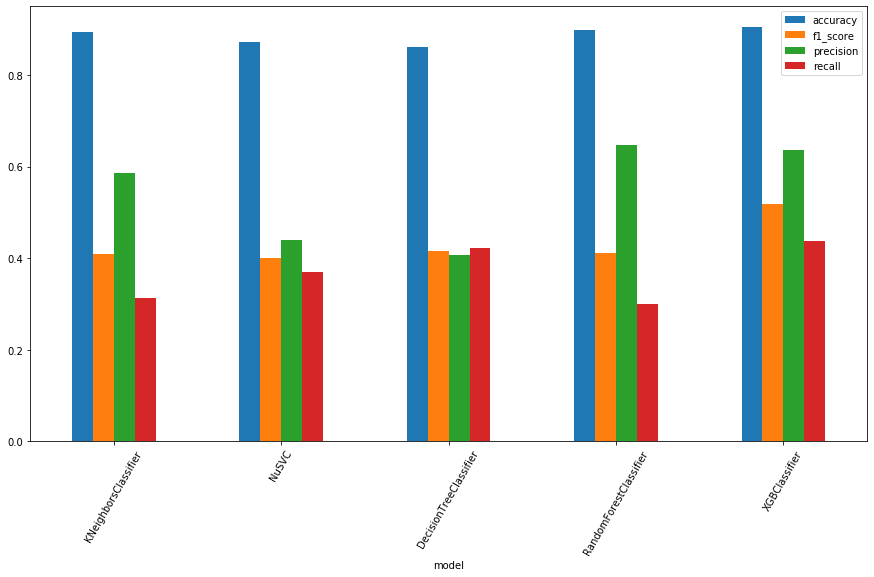

In [116]:
df_models.plot(x='model',figsize=(15,8),kind='bar',rot=60);